In [1]:
from utils import split_data

PATH = "./data/"
splitter = split_data(PATH + "raw.csv", PATH, test_size=0.1,
                          train_size=0.3)
x_train, y_train, x_test, y_test = splitter.split()

/home/paperspace/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
from utils import translate

translater = translate()
x_train = translater.translate(x_train)
x_test = translater.translate(x_test)

In [3]:
from utils import standardize

y_train_std, y_test_std = standardize(y_train, y_test)

In [4]:
from keras.layers import (Embedding, Bidirectional, CuDNNGRU, Dense)
from modelArchitecture.Attention import Attention
from modelArchitecture.ResnetRnnDense import ResnetRnnDense

class simple_model():
    def compile(self, x):
        x = Embedding(22, 32, input_length=32)(x)
        
        x = Bidirectional(CuDNNGRU(256, return_sequences=True))(x)
        x = CuDNNGRU(512, return_sequences=True)(x)
        x = Attention()(x)
        x = Dense(512, activation="elu")(x)
        return Dense(1)(x)

In [5]:
from HydraMethod import HydraMethod

In [6]:
one_head_hydra = HydraMethod(simple_model, 1);one_head_hydra.compile()

In [7]:
from utils import LRFinder

In [8]:
lr_finder = LRFinder(one_head_hydra.get_model())
lr_finder.find(one_head_hydra.get_all_representation(x_train), 
               y_train_std, 0.000001, 1, 256, 3,fit=True)

Epoch 1/3
319750/319750 [==============================] - 64s 199us/step - loss: 0.5244
Epoch 2/3
319750/319750 [==============================] - 59s 186us/step - loss: 0.1855
Epoch 3/3
 40704/319750 [==>...........................] - ETA: 52s - loss: 0.1636

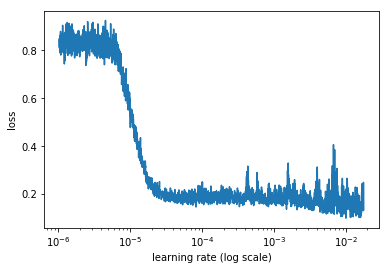

In [9]:
lr_finder.plot_loss()

In [10]:
one_head_hydra.compile(learning_rate=1e-4)
trained_one_head_hydra = one_head_hydra.fit(x_train, y_train_std, x_test, y_test_std,batch_size=256)

Train on 319750 samples, validate on 113053 samples
Epoch 1/3
319750/319750 [==============================] - 66s 205us/step - loss: 0.0923 - val_loss: 0.0805
Epoch 2/3
319750/319750 [==============================] - 64s 200us/step - loss: 0.0800 - val_loss: 0.0759
Epoch 3/3
319750/319750 [==============================] - 64s 201us/step - loss: 0.0739 - val_loss: 0.0719


In [11]:
two_head_hydra = HydraMethod(simple_model, 2);two_head_hydra.compile()

In [12]:
lr_finder = LRFinder(two_head_hydra.get_model())
lr_finder.find(two_head_hydra.get_all_representation(x_train), 
               y_train_std, 0.000001, 1, 256, 3,fit=True)

Epoch 1/3
319750/319750 [==============================] - 117s 367us/step - loss: 0.5534
Epoch 2/3
 16640/319750 [>.............................] - ETA: 1:47 - loss: 0.1848

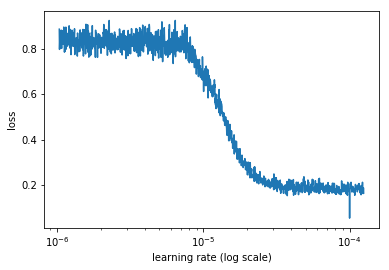

In [13]:
lr_finder.plot_loss()

In [17]:
two_head_hydra.compile(learning_rate=1e-3)
trained_two_head_hydra = two_head_hydra.fit(x_train, y_train_std, x_test, y_test_std, batch_size=256)

Train on 319750 samples, validate on 113053 samples
Epoch 1/3
319750/319750 [==============================] - 132s 412us/step - loss: 0.1400 - val_loss: 0.2330
Epoch 2/3
 78848/319750 [======>.......................] - ETA: 1:25 - loss: 0.1077

KeyboardInterrupt: 

In [18]:
three_head_hydra = HydraMethod(simple_model, 3);three_head_hydra.compile()

In [19]:
lr_finder = LRFinder(three_head_hydra.get_model())
lr_finder.find(three_head_hydra.get_all_representation(x_train), 
               y_train_std, 0.000001, 1, 256, 3,fit=True)

Epoch 1/3
319750/319750 [==============================] - 178s 557us/step - loss: 0.5089
Epoch 2/3
303872/319750 [===========================>..] - ETA: 8s - loss: 0.1753

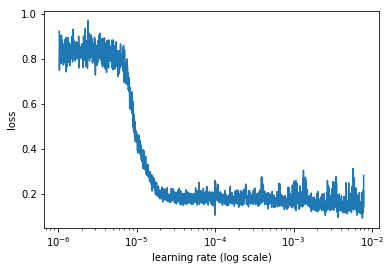

In [20]:
lr_finder.plot_loss()

In [21]:
three_head_hydra.compile(learning_rate=2e-5)
trained_three_head_hydra = three_head_hydra.fit(x_train, y_train_std, x_test, y_test_std, batch_size=256)

Train on 319750 samples, validate on 113053 samples
Epoch 1/3
319750/319750 [==============================] - 197s 615us/step - loss: 0.0968 - val_loss: 0.0884
Epoch 2/3
 25344/319750 [=>............................] - ETA: 2:35 - loss: 0.0904

KeyboardInterrupt: 

In [ ]:
four_head_hydra = HydraMethod(simple_model, 4);four_head_hydra.compile()

In [ ]:
lr_finder = LRFinder(four_head_hydra.get_model())
lr_finder.find(four_head_hydra.get_all_representation(x_train), 
               y_train_std, 0.000001, 1, 256, 3,fit=True)

In [ ]:
lr_finder.plot_loss()

In [ ]:
four_head_hydra.compile(learning_rate=1e-3)
trained_four_head_hydra = four_head_hydra.fit(x_train, y_train_std, x_test, y_test_std, batch_size=256)

In [ ]:
one_head_hydra = HydraMethod(ResnetRnnDense, 1);one_head_hydra.compile()

In [ ]:
from utils import LRFinder

In [ ]:
lr_finder = LRFinder(one_head_hydra.get_model())
lr_finder.find(one_head_hydra.get_all_representation(x_train), 
               y_train_std, 0.000001, 1, 64, 3,fit=True)

In [ ]:
lr_finder.plot_loss()

In [ ]:
one_head_hydra.compile(learning_rate=1e-3)
trained_one_head_hydra = one_head_hydra.fit(x_train, y_train_std, x_test, y_test_std)

In [ ]:
two_head_hydra = HydraMethod(ResnetRnnDense, 2);two_head_hydra.compile()

In [ ]:
lr_finder = LRFinder(two_head_hydra.get_model())
lr_finder.find(two_head_hydra.get_all_representation(x_train), 
               y_train_std, 0.000001, 1, 64, 3,fit=True)

In [ ]:
lr_finder.plot_loss()

In [ ]:
two_head_hydra.compile(learning_rate=4e-5)
trained_two_head_hydra = two_head_hydra.fit(x_train, y_train_std, x_test, y_test_std)